<a href="https://colab.research.google.com/github/rhyan05/Machine-Learning/blob/main/Tratamento%20e%20Classifca%C3%A7%C3%A3o/tratamento_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXPLORAÇÃO, ANÁLISE E TRATAMENTO DOS DADOS: PROJETO PREVISÃO DE DOENÇA CARDÍACA**

Este projeto tem por objetivo desenvolver um algoritmo de Machine Learning para prever a tendência de uma pessoa desenvolver algum tipo de doença cardíaca com base em alguns fatores clínicos e laboratoriais de referência.

Os dados foram extraídos do site do Kaggle:

https://www.kaggle.com/fedesoriano/heart-failure-prediction/version/1

In [ ]:
#Importar as bibliotecas para manipular os dados (Recursos)
import numpy as np
import pandas as pd

In [ ]:
#Montar drive para usar os arquivos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Carregar o aquivo usando a variável df -> rodar a celula, ir no simbolo das pastas -> drive- my drive -> procura o arquivo -> botao direito ou ir nos tres pontinhos -> copiar caminho
dados = pd.read_csv('/content/drive/MyDrive/seu caminho',
                    sep=',', encoding='iso-8859-1')
# encoding: codificação de caracteres, normalmente utiliza-se o iso-8859-1, utf-8, latin-1)

## **Exploração dos Dados**

In [ ]:
#Carregar 5 primeiras linhas da tabala
dados.head()
#dados.head(50) - #Carregar 50 primeiras linhas da tabala

In [ ]:
#Carregar 5 últimos linhas da tabala
dados.tail()

In [ ]:
#Mostrar números de colunas e linhas
dados.shape

(918, 12)

## **Análise das Variáveis (Atributos)**

### **Age = idade**

In [ ]:
#Analizar os dados de idade e contar quantos para cada idade
dados['Age'].value_counts()

In [ ]:
#Ordenar os dados
dados['Age'].value_counts().sort_index()

In [ ]:
#importar uma biblioteca para fazer um grafico (para ver a distribuição de dados)
import plotly.express as px

In [ ]:
#Fazer um histograma para x = idade e largura da coluna = 60
hist1 =  px.histogram (dados,  x = "Age", nbins=60)
#Definir layout
hist1.update_layout(width=800,height=500,title_text='Distribuição das idades')
#Mostrar o grafico
hist1.show()

In [ ]:
#Importar uma outra bibilioteca para fazer o grafico (histograma)
import seaborn as sns

In [ ]:
sns.histplot(dados, x='Age', bins=30, color="orange", kde=True, stat="count");

### **Sex = sexo**

In [ ]:
#Analisar os dados "sex"
dados['Sex'].value_counts()

,count
Sex,
M,725
F,193


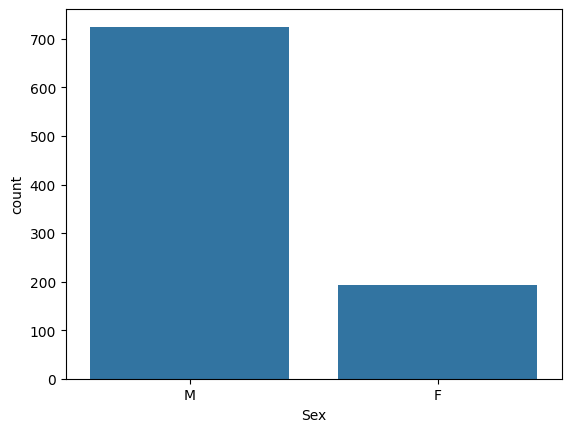

In [ ]:
# Um grafico de base : pois dados são simples
sns.countplot(x='Sex', data=dados);

### **Chest Pain Type = tipo de dor no peito**

In [ ]:
dados['ChestPainType'].value_counts()

ASY: assintomático.

NAP: dor não anginosa.

ATA: angina atípica.

TA: angina típica.

Angina: é o nome de um de tipo de dor no peito que ocorre quando o músculo do coração (miocárdio) recebe uma quantidade de sangue menor do que seria necessário para o seu funcionamento normal.







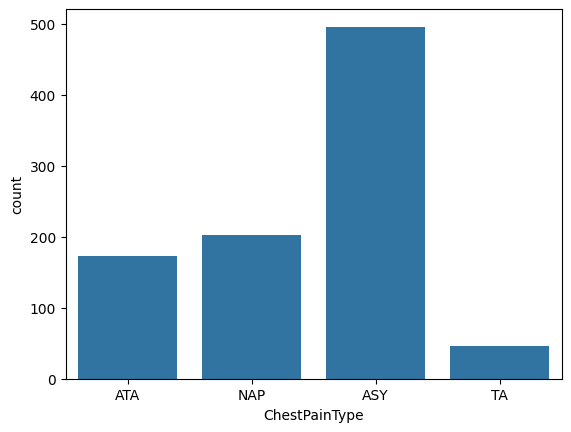

In [ ]:
sns.countplot(x='ChestPainType', data=dados);

### **Resting BP (blood pressure) = pressão sanguínea em repouso em mmHg(sistólica)**

In [ ]:
dados.RestingBP.value_counts().sort_index()

,count
RestingBP,
0,1
80,1
92,1
94,2
95,6
...,...
180,12
185,1
190,2


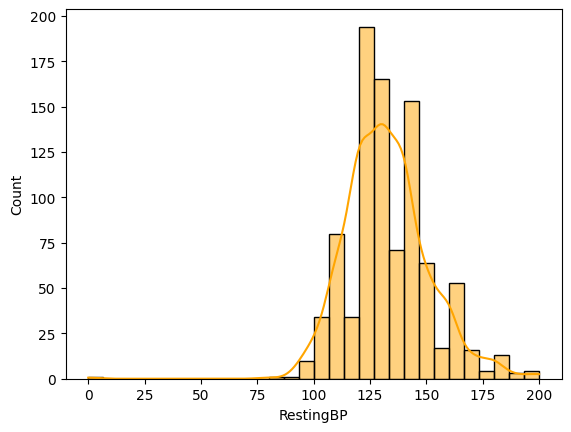

In [ ]:
sns.histplot(dados, x='RestingBP', bins=30, color="orange", kde=True, stat="count");

### **Cholesterol = colesterol sérico (mg/dl)**

In [ ]:
dados.Cholesterol.value_counts().sort_index()

,count
Cholesterol,
0,172
85,1
100,2
110,1
113,1
...,...
491,1
518,1
529,1


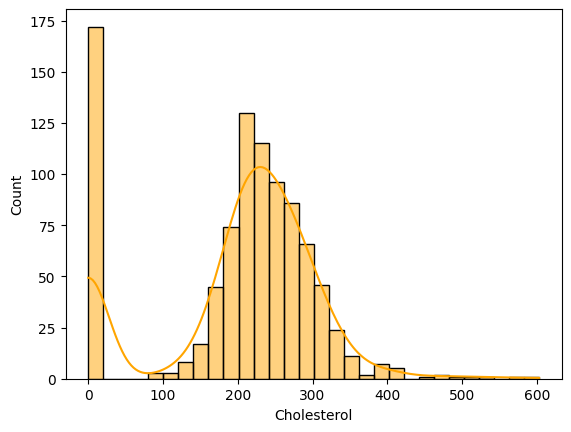

In [ ]:
sns.histplot(dados, x='Cholesterol', bins=30, color="orange", kde=True, stat="count");

### **Fasting BS (blood sugar) = açúcar no sangue em jejum (mg/dl)**

In [ ]:
dados.FastingBS.value_counts()

,count
FastingBS,
0,704
1,214


0: Fasting BS < 120 mg/dl (não diabético)

1: Fasting BS >= 120 mg/dl, (diabético)

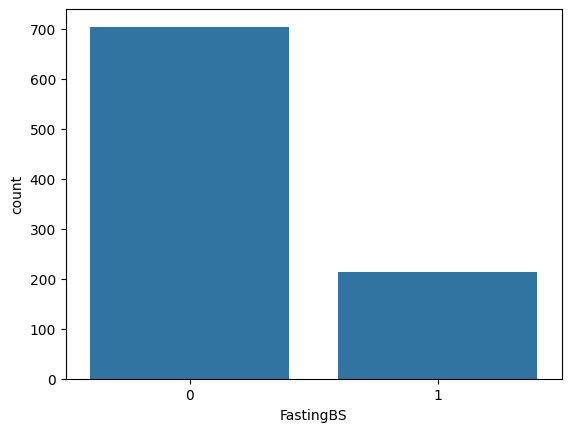

In [ ]:
sns.countplot(x='FastingBS', data=dados);

### **Resting ECG = eletrocardiograma em repouso**

In [ ]:
dados.RestingECG.value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


Normal: Normal

LVH: Hipertrofia ventricular esquerda

ST: Anormalidade da onda ST-T

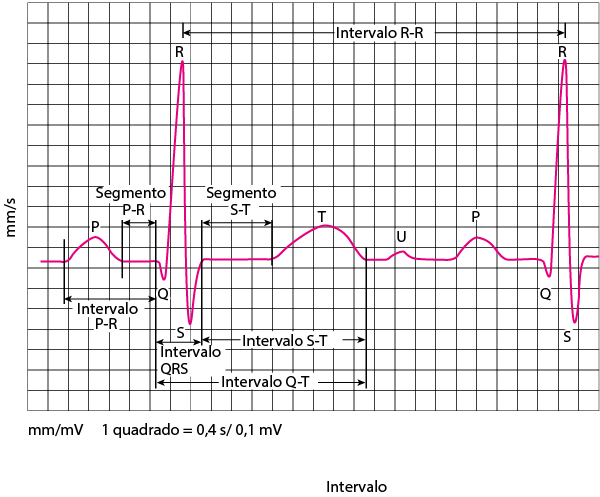

**SEGMENTO ST:** Qualquer desnível do
segmento ST, para cima (supradesnível) ou para baixo
(infradesnível), deve ser avaliado pois pode corresponder a um
infarto agudo do miocárdio.

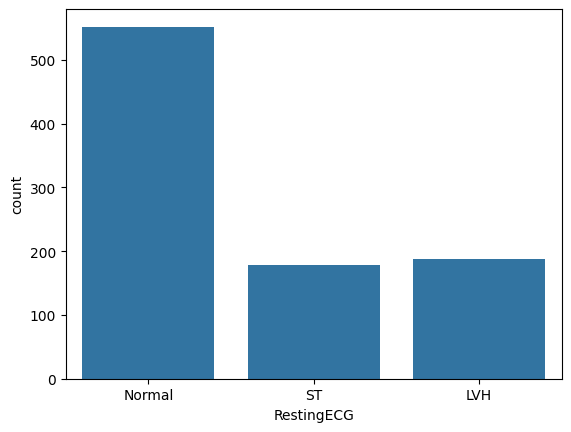

In [ ]:
sns.countplot(x='RestingECG', data=dados);

### **Max HR (heart rate) = frequência cardíaca máxima**

In [ ]:
dados['MaxHR'].value_counts()

,count
MaxHR,
150,43
140,41
120,36
130,33
160,25
...,...
63,1
83,1
60,1


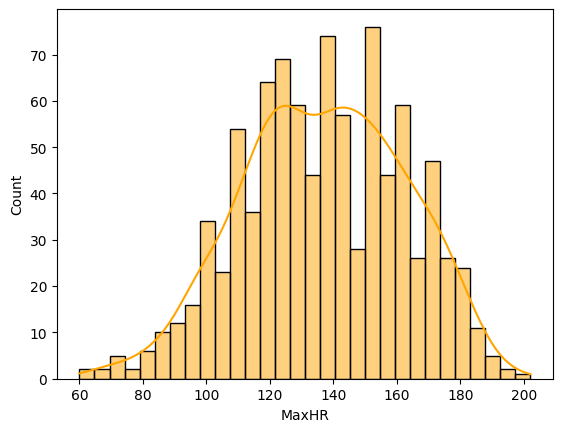

In [ ]:
sns.histplot(dados, x='MaxHR', bins=30, color="orange", kde=True, stat="count");

### **Exercise Angina = Angina induzida por exercício**

In [ ]:
dados['ExerciseAngina'].value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [ ]:
#Grafico em pizza
px.pie(dados, 'ExerciseAngina')

### **Old Peak = Depressão de ST (referência no ECG) induzida por exercício em relação ao repouso**

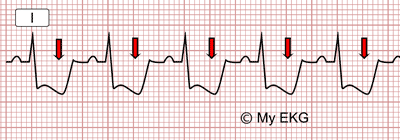

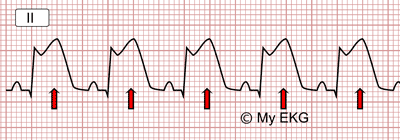

In [ ]:
dados['Oldpeak'].value_counts()

,count
Oldpeak,
0.0,368
1.0,86
2.0,76
1.5,53
3.0,28
1.2,26
0.2,22
0.5,19
1.4,18


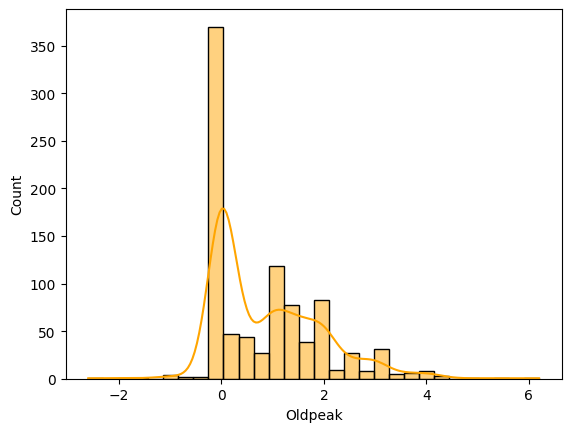

In [ ]:
sns.histplot(dados, x='Oldpeak', bins=30, color="orange", kde=True, stat="count");

### **ST_Slope = Inclinação do segmento ST no ECG**

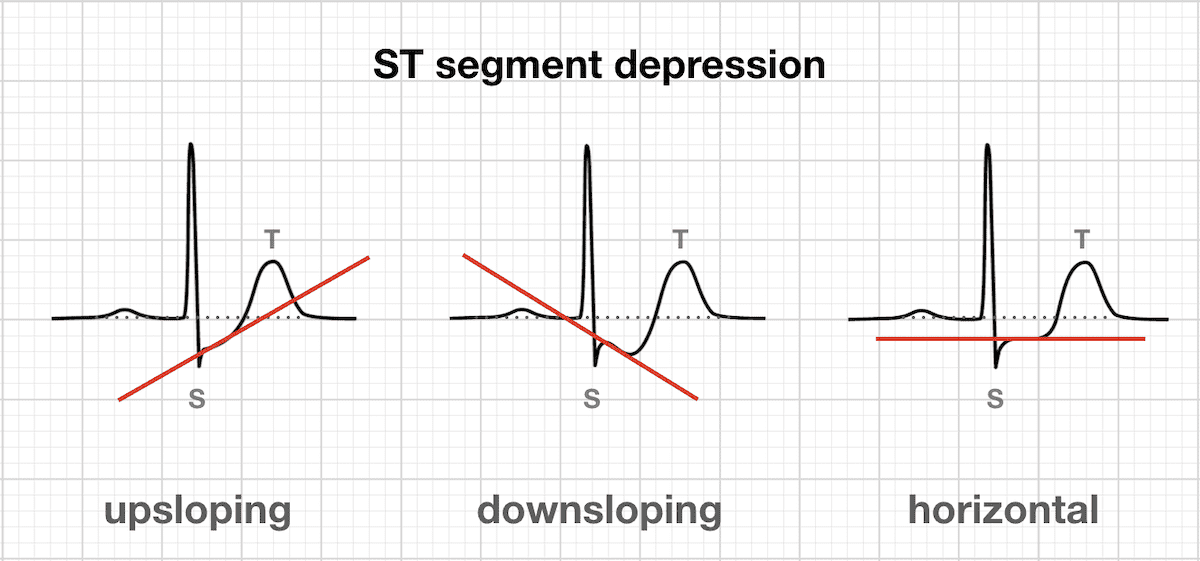

In [ ]:
dados['ST_Slope'].value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


Flat = plano

Up = para cima

Down = para baixo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
px.pie(dados, 'ST_Slope')

### **Heart Disease = Doença cardíaca**

In [ ]:
dados['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


0 = Não possui doença cardíaca

1 = Possui doença cardíaca



In [ ]:
px.pie(dados, 'HeartDisease')

## **Análise dos tipos de atributos.**

In [ ]:
# object: strings (Object)
# int64: inteiros
# float64: reais
# complex: complexos
#Mostrar os tipo de dados
dados.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


## **Valores Missing (NAN)**

In [ ]:
# RELAÇÃO DA QUANTIDADE de dados nulls
dados.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
# EXCLUIR VALORES MISSING
#Manter os dados originais
dados2 = dados.dropna()

In [ ]:
dados2.shape

(918, 12)

In [ ]:
dados2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2['Age'].fillna(dados2['Age'].mean(), inplace=True)

In [ ]:
# SUBSTITUIR OS VALORES MISSING POR QUALQUER OUTRO VALOR
dados2['Age'].fillna(10, inplace=True)

## **Análises Estatísticas Descritivas**

In [ ]:
#Mostrar os dados usando análise estatística
dados.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
#Mostrar o valor média ou mediano (pela definição estatística)
dados.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,0,0,Normal,150,N,0.0,Flat,1


### **Tratando Valores Incoerentes**

**Excluindo registro com pressão zero**

In [ ]:
#Excluindo registro com pressão zero
dados2 = dados.loc[dados.RestingBP != 0]

In [ ]:
#Verificar se for excluindo o registro
dados2.shape

(918, 12)

In [ ]:
#Verificar se for excluindo o registro
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,199.016358,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,109.246330,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,174.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


**Substituindo valores zeros do Colesterol pela média sem os zeros**

In [ ]:
#Verificar quantos valores são zeros para campo "Cholestrol"
dados2.Cholesterol.value_counts()

,count
Cholesterol,
0,171
254,11
223,10
220,10
230,9
...,...
392,1
316,1
153,1


In [ ]:
#Como tem muitos valores, verificar o valor medio
dados2.Cholesterol.mean()

199.0163576881134

In [ ]:
#tirar os valores zero como dados perdidos (missing) usando np.NaN
dados2.Cholesterol.replace(0, np.NaN, inplace=True)

In [ ]:
#Verificar os dados perdidos
dados2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,171
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
#Verificar o valor médio
dados2.Cholesterol.mean()

244.6353887399464

In [ ]:
# SUBSTITUIR OS VALORES MISSING PELA MÉDIA
dados2['Cholesterol'].fillna(dados2['Cholesterol'].mean(), inplace=True)

<ipython-input-56-1fdef301d1f0>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
dados2.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
dados2.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000,917.000000
mean,53.509269,132.540894,244.635389,0.233370,136.789531,0.886696,0.552890
std,9.437636,17.999749,53.347125,0.423206,25.467129,1.066960,0.497466
min,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,214.000000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,244.635389,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
dados2.mode()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,54,M,ASY,120,244.635389,0,Normal,150,N,0.0,Flat,1


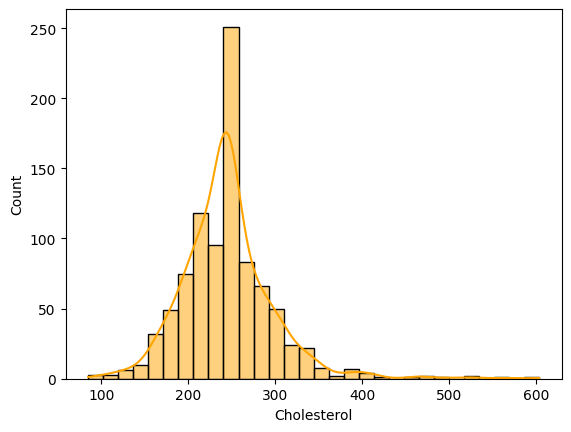

In [ ]:
sns.histplot(dados2, x='Cholesterol', bins=30, color="orange", kde=True, stat="count");

### **Análise de Outliers**

Outlier - Anális sobres os dados fora do comum

In [ ]:
# Idade
px.box(dados2, y='Age')

In [ ]:
# Pressão Sanguínea em Repouso
px.box(dados2, y='RestingBP')

In [ ]:
# Colesterol
px.box(dados2, y='Cholesterol')

In [ ]:
# Frequência Cardíaca Máxima
px.box(dados2, y='MaxHR')

## **Salvando (Exportando) o Dataframe Tratado**

In [ ]:
#Salvar os dados novos como heart_tratado.csv
dados2.to_csv('heart_tratado.csv', sep=';', encoding='utf-8', index = False)